# **Lesson 03 : Data Mining Feature Scaling & Reduction & Engineering**

In [ ]:
# Library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
dataset_name = 'AI Specialist Lesson 03.zip'
dataset_path = os.path.join(path, dataset_name)

os.mkdir('Lesson 03')
lesson_path = os.path.join('/content', 'Lesson 03')
os.chdir(lesson_path)

with zipfile.ZipFile(dataset_path, 'r') as dataset_zipfile:
  dataset_zipfile.extractall(lesson_path)

In [ ]:
!pwd

/content/Lesson 03


### **1. Read and describe data**

In [ ]:
data = pd.read_csv('AI Specialist Lesson 03/person_data.csv')
display(data.head())
print(data.shape)

,Age,Height,Weight
0,10,138,23.0
1,11,138,22.0
2,12,138,23.5
3,13,139,24.0
4,14,139,26.0


(71, 3)


In [ ]:
data.describe(include='number')

,Age,Height,Weight
count,71.000000,71.000000,71.000000
mean,45.000000,160.873239,65.281690
std,20.639767,20.842902,17.752805
min,10.000000,138.000000,22.000000
25%,27.500000,143.500000,59.750000
50%,45.000000,155.000000,70.000000
75%,62.500000,171.500000,77.000000
max,80.000000,208.000000,96.000000


### **2. Feature Scaling**

In [ ]:
# https://github.com/thanhhff/AIVN-Machine-Learning/blob/master/Week%203/Feature-Normalization.ipynb

In [ ]:
feature, target = ['Age', 'Height'], 'Weight'
X, y = data[feature].values, data[target]
print(X.shape, y.shape)

(71, 2) (71,)


In [ ]:
# Data Transformation (Scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

meanX,stdX = np.mean(X, axis=0), np.std(X, axis=0)
print(f'Mean X: {meanX}, Std X: {stdX}')
meanX_scaled, stdX_scaled = np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0)
print(f'Mean X_scaled: {np.round(meanX_scaled, 2)}, Std X_scaled: {stdX_scaled}')

Mean X: [ 45.         160.87323944], Std X: [20.49390153 20.69560039]
Mean X_scaled: [0. 0.], Std X_scaled: [1. 1.]


In [ ]:
print(X[0])
print(X_scaled[0])

[ 10 138]
[-1.70782513 -1.10522232]


### **3. Reduction**

##### **3.1 Data visualize**

In [ ]:
def BiVariateVisualize(data, feature1, feature2):
  plt.figure(figsize=(15, 5))
  plt.scatter(data[feature1], data[feature2])
  plt.title(f'{feature1} Vs {feature2} Analysis')
  plt.xlabel(feature1, size=15)
  plt.ylabel(feature2, size=15)
  plt.grid()
  plt.show()

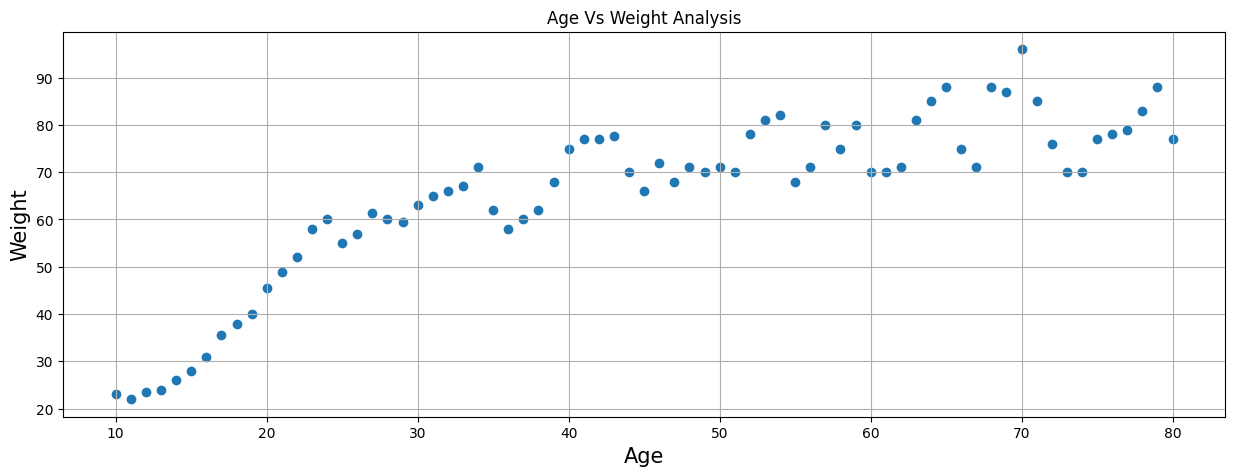

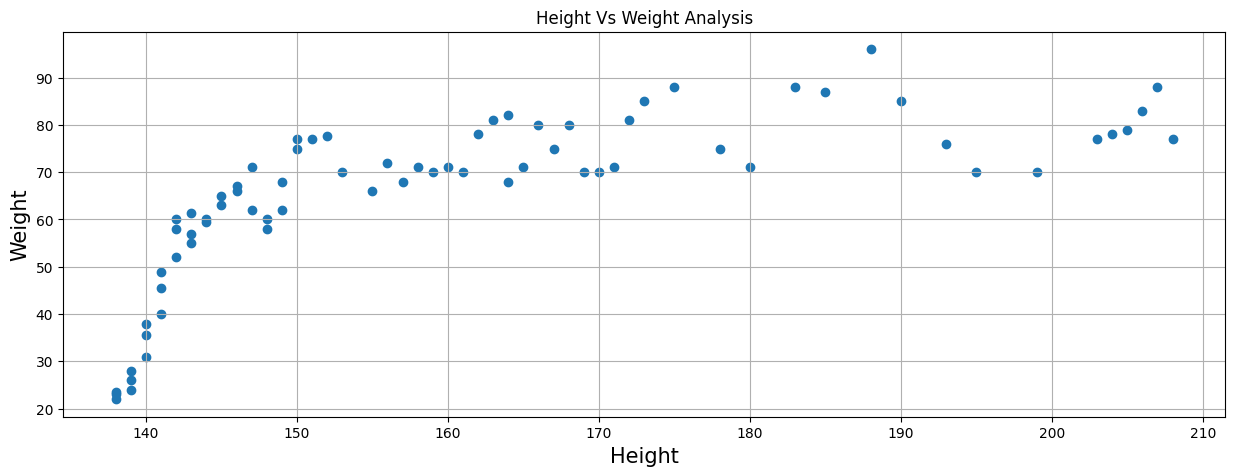

In [ ]:
feature1,feature2='Age','Weight'
BiVariateVisualize(data, feature1=feature1, feature2=feature2)

feature1,feature2='Height','Weight'
BiVariateVisualize(data, feature1, feature2)

In [ ]:
display(data.corr())

,Age,Height,Weight
Age,1.000000,0.947283,0.850335
Height,0.947283,1.000000,0.692949
Weight,0.850335,0.692949,1.000000


>Nhận Xét:
* Từ bảng tương quan: 'Age' và 'Height' có tương quan với 'Weight' là gần như nhau.
* Từ đồ thị: Phân bố trên đồ thị của 'Age' và 'Hight' so với 'Weight' có dạng gần giống nhau.
* ==> Có thể giảm bớt 1 chiều dữ liệu, các kết quả sau khi giảm chiều sẽ không ảnh hưởng tới kết quả bài toán, vì các thành phần trong chiều dữ liệu mới đã bao gồm các chiều dữ liệu cũ.

##### **3.2 Data Transformation (Reduction-PCA)**

In [ ]:
# https://machinelearningcoban.com/2017/06/15/pca/

from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=93)
X_pca = pca.fit_transform(X_scaled)

print(X[0])
print(X_scaled[0])
print(X_pca[0])

[ 10 138]
[-1.70782513 -1.10522232]
[-1.98912492]


In [ ]:
data01 = data.copy()
data01['PCA1'] = X_pca
display(data01.head())

,Age,Height,Weight,PCA1
0,10,138,23.0,-1.989125
1,11,138,22.0,-1.954622
2,12,138,23.5,-1.920118
3,13,139,24.0,-1.851448
4,14,139,26.0,-1.816945


##### **3.3 Data Visualization After Transformation**

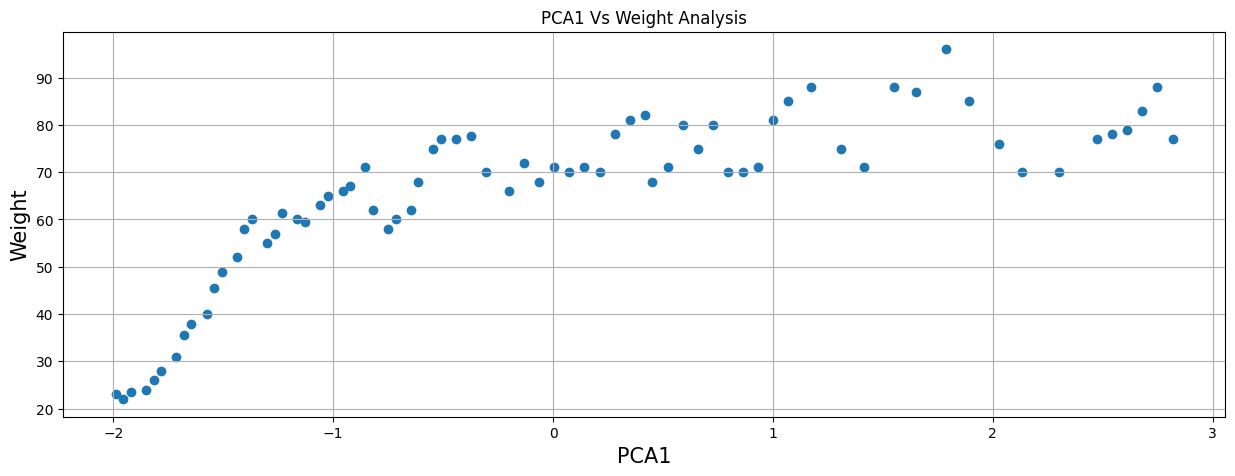

In [ ]:
feature1, feature2 = 'PCA1', 'Weight'
BiVariateVisualize(data01, feature1, feature2)

In [ ]:
display(data01.corr())

,Age,Height,Weight,PCA1
Age,1.000000,0.947283,0.850335,0.986733
Height,0.947283,1.000000,0.692949,0.986733
Weight,0.850335,0.692949,1.000000,0.782017
PCA1,0.986733,0.986733,0.782017,1.000000


>Nhận Xét:
* Sau khi áp dụng PCA để giảm chiều, phân bố và tương quan với target của feature mới cũng tương tự như 2 feature cũ

### **4. Data Modelling**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_feature = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_feature.fit_transform(X_pca)

print(X_pca.shape)
print(X_poly.shape)

(71, 1)
(71, 4)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

linear_regress = LinearRegression()
linear_regress.fit(X_poly, y)
y_pred = linear_regress.predict(X_poly)
print(f'Rsquare2: {r2_score(y, y_pred)}')

Rsquare2: 0.9017224665462797


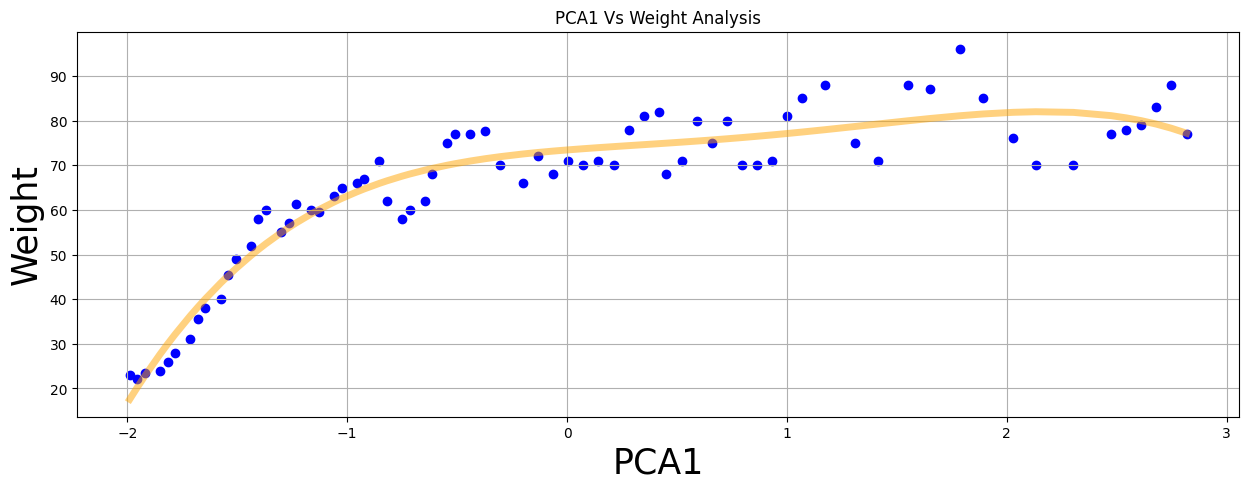

In [ ]:
feature1, feature2 = "PCA1", "Weight"
plt.figure(figsize=(15,5))
plt.plot(X_pca, y_pred, color = 'orange', linewidth=5, alpha = 0.5)
plt.scatter(X_pca, data[target], color = 'blue')
plt.title(f'{feature1} Vs {feature2} Analysis')
plt.xlabel(feature1, size = 25)
plt.ylabel(feature2, size = 25)
plt.grid()
plt.show()

### **5. Construct Pipeline**

In [ ]:
%%writefile WeightPredictionModule.py
# Model Deployment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def ConstructModel(X, y, polyDegree):
  # Construct Model
  sc = StandardScaler()
  pca = PCA(n_components=1, random_state=93)
  poly_feature = PolynomialFeatures(degree=polyDegree, include_bias=False)
  lin_reg = LinearRegression()

  poly_reg_model = Pipeline([('std_scaler', sc),
                             ('pca', pca),
                             ('poly', poly_feature),
                             ('regressor', lin_reg)])
  poly_reg_model.fit(X, y)
  return poly_reg_model

def Prediction(X_new, poly_reg_model):
  y_predict = poly_reg_model.predict(X_new)
  return y_predict

def ReportAccuracy(y, y_predict, display=1):
  Rsquare2 = r2_score(y, y_predict)
  MSE = mean_squared_error(y, y_predict, squared=True)
  RMSE = mean_squared_error(y, y_predict, squared=False)
  MAE = mean_absolute_error(y, y_predict)

  if display:
    print(f'Rsquare2: {Rsquare2}')
    print(f'MES:      {MSE}')
    print(f'RMSE:     {RMSE}')
    print(f'MAE:      {MAE}')
  return {'Rsquare2' : Rsquare2, 'MSE' : MSE, 'RMSE': RMSE, 'MAE' : MAE}

def Visualization(poly_reg_model, X, y):
  sc = poly_reg_model.named_steps['std_scaler']
  X_scaled = sc.fit_transform(X)
  pca = poly_reg_model.named_steps['pca']
  X_pca = pca.fit_transform(X_scaled)
  y_predict = poly_reg_model.predict(X)

  feature1 = 'X_PCA'
  feature2 = 'Weight'

  plt.figure(figsize=(15, 7))
  plt.scatter(X_pca, y, color = 'red')
  plt.plot(X_pca, y_predict, color = 'blue', linewidth=5)
  plt.title(f'{feature1} Vs {feature2} Analysis')
  plt.xlabel(feature1, size = 25)
  plt.ylabel(feature2, size = 25)
  plt.show()

Writing WeightPredictionModule.py


In [ ]:
!pwd

/content/Lesson 03


In [ ]:
display(data.head())

,Age,Height,Weight
0,10,138,23.0
1,11,138,22.0
2,12,138,23.5
3,13,139,24.0
4,14,139,26.0


(71, 2) (71,)
Rsquare2: 0.9017224665462797
MES:      30.537108294757267
RMSE:     5.52603911447949
MAE:      4.615509716760006


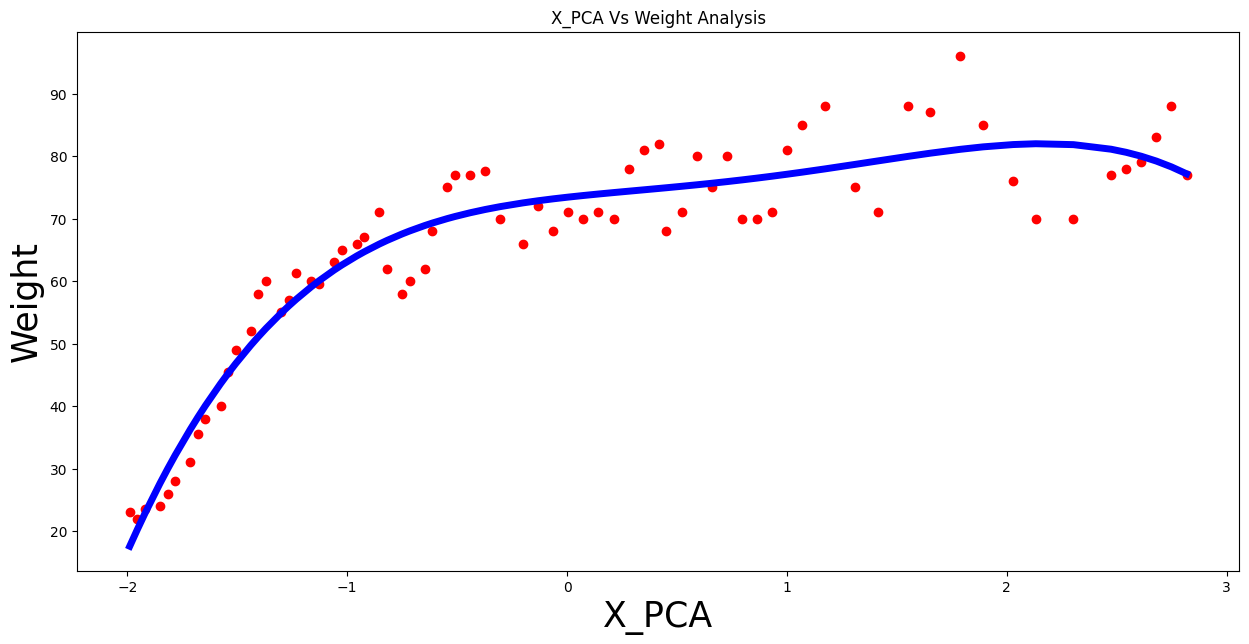

In [ ]:
import WeightPredictionModule as wpm

feature = ['Age', 'Height']
target = 'Weight'
X = data[feature].values
y = data[target]
print(X.shape, y.shape)

model = wpm.ConstructModel(X, y, polyDegree=4)
y_predict = wpm.Prediction(X, model)
reportAcc = wpm.ReportAccuracy(y, y_predict, display=1)
# display(reportAcc)
wpm.Visualization(model, X, y)

### **6. Model Deployment (Model Saved and Loaded)**

In [ ]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
import dill
file_name = 'polynomial_regression_model.dill'
with open(file_name, 'wb') as f:
  dill.dump(model, f)
  print('Finish saving model in dill')

Finish saving model in dill


Rsquare2: 0.9017224665462797
MES:      30.537108294757267
RMSE:     5.52603911447949
MAE:      4.615509716760006


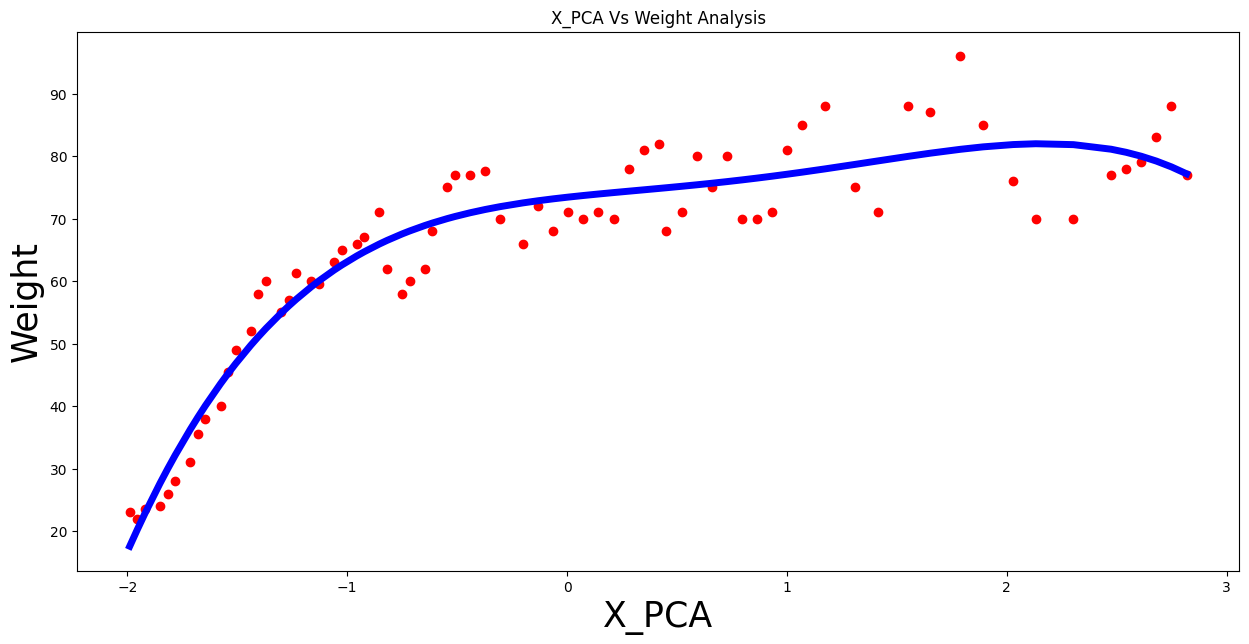

In [ ]:
with open(file_name, 'rb') as f:
  poly_reg_loadmodel = dill.load(f)

y_predict = wpm.Prediction(X, poly_reg_loadmodel)
reportAcc = wpm.ReportAccuracy(y, y_predict, display=1)
wpm.Visualization(poly_reg_loadmodel, X, y)

### **7. Flask API for Web**
https://programminghistorian.org/en/lessons/creating-apis-with-python-and-flask

In [ ]:
!python --version

Python 3.10.12
